# Importing the Dataset

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!wget 'https://drive.google.com/uc?export=download&id=1tWf7c-WDVgnNB0FhDFmRCsuthKYpDn8l' -O purchases.txt

--2024-07-23 14:10:08--  https://drive.google.com/uc?export=download&id=1tWf7c-WDVgnNB0FhDFmRCsuthKYpDn8l
Resolving drive.google.com (drive.google.com)... 142.251.8.100, 142.251.8.102, 142.251.8.113, ...
Connecting to drive.google.com (drive.google.com)|142.251.8.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1tWf7c-WDVgnNB0FhDFmRCsuthKYpDn8l&export=download [following]
--2024-07-23 14:10:09--  https://drive.usercontent.google.com/download?id=1tWf7c-WDVgnNB0FhDFmRCsuthKYpDn8l&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.204.132, 2404:6800:4008:c04::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.204.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1107176 (1.1M) [application/octet-stream]
Saving to: ‘purchases.txt’

purchases.txt       100%[===================>]   1.06M  --.-KB/s    i

In [ ]:
from os import sep
data = pd.read_csv('/content/purchases.txt', sep = '\t', header = None)
data.head()

,0,1,2
0,760,25.0,2009-11-06
1,860,50.0,2012-09-28
2,1200,100.0,2005-10-25
3,1420,50.0,2009-07-09
4,1940,70.0,2013-01-25


In [ ]:
data.shape

(51243, 3)

In [ ]:
data.isnull().sum().sort_values(ascending = False)

0    0
1    0
2    0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51243 entries, 0 to 51242
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       51243 non-null  int64  
 1   1       51243 non-null  float64
 2   2       51243 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.2+ MB


In [ ]:
# Check if the data was read correctly
if data is not None:
    # Changing the column names
    data.columns = ['cust_id', 'amount', 'trans_date']

    # Displaying the first few rows to verify the change
    print(data.head())
else:
    print("Error: The DataFrame is None. Please check the file path and format.")

   cust_id  amount  trans_date
0      760    25.0  2009-11-06
1      860    50.0  2012-09-28
2     1200   100.0  2005-10-25
3     1420    50.0  2009-07-09
4     1940    70.0  2013-01-25


In [ ]:
data.head()

,cust_id,amount,trans_date
0,760,25.0,2009-11-06
1,860,50.0,2012-09-28
2,1200,100.0,2005-10-25
3,1420,50.0,2009-07-09
4,1940,70.0,2013-01-25


In [ ]:
data.isnull().sum().sort_values(ascending = False)

cust_id       0
amount        0
trans_date    0
dtype: int64

In [ ]:
data.shape

(51243, 3)

In [ ]:
data['trans_date'] = pd.to_datetime(data['trans_date'], errors='coerce')
print(data.head())
print(data.info())

   cust_id  amount trans_date
0      760    25.0 2009-11-06
1      860    50.0 2012-09-28
2     1200   100.0 2005-10-25
3     1420    50.0 2009-07-09
4     1940    70.0 2013-01-25
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51243 entries, 0 to 51242
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   cust_id     51243 non-null  int64         
 1   amount      51243 non-null  float64       
 2   trans_date  51243 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 1.2 MB
None


# RFM Analysis

### Creating the RFM DataFrame

In [ ]:
data1 = data.copy()

In [ ]:
import datetime as dt

In [ ]:
# Define the reference date as the day after the last transaction
reference_date = data1['trans_date'].max() + dt.timedelta(days=1)

In [ ]:
# Calculate RFM metrics for each customer
rfm = data1.groupby('cust_id').agg({
    'trans_date': lambda x: (reference_date - x.max()).days,  # Recency
    'cust_id': 'count',                                        # Frequency
    'amount': 'sum'                                            # Monetary
}).rename(columns={
    'trans_date': 'Recency',
    'cust_id': 'Frequency',
    'amount': 'Total Amount'
}).reset_index()

In [ ]:
rfm.head()

,cust_id,Recency,Frequency,Total Amount
0,10,3829,1,30.0
1,80,343,7,500.0
2,90,758,10,1158.0
3,120,1401,1,20.0
4,130,2970,2,100.0


In [ ]:
rfm['Monetary'] = rfm['Total Amount'] / rfm['Frequency']
rfm.head()

,cust_id,Recency,Frequency,Total Amount,Monetary
0,10,3829,1,30.0,30.000000
1,80,343,7,500.0,71.428571
2,90,758,10,1158.0,115.800000
3,120,1401,1,20.0,20.000000
4,130,2970,2,100.0,50.000000


In [ ]:
rfm = rfm.drop(columns=['Total Amount'], axis=1)
rfm.head()

,cust_id,Recency,Frequency,Monetary
0,10,3829,1,30.000000
1,80,343,7,71.428571
2,90,758,10,115.800000
3,120,1401,1,20.000000
4,130,2970,2,50.000000


In [ ]:
rfm.shape

(18417, 4)

In [ ]:
rfm1=rfm.copy(deep=True)

In [ ]:
rfm1.shape

(18417, 4)

### Checking the Distributions of R, F, M

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-23-8dff1468d5e7>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm['Recency'])
<ipython-input-23-8dff1468d5e7>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm['Frequency'])
<ipython-input-23-8dff1468d5e7>:16: UserWarning: 

`distplot` is a deprecated function and will be 

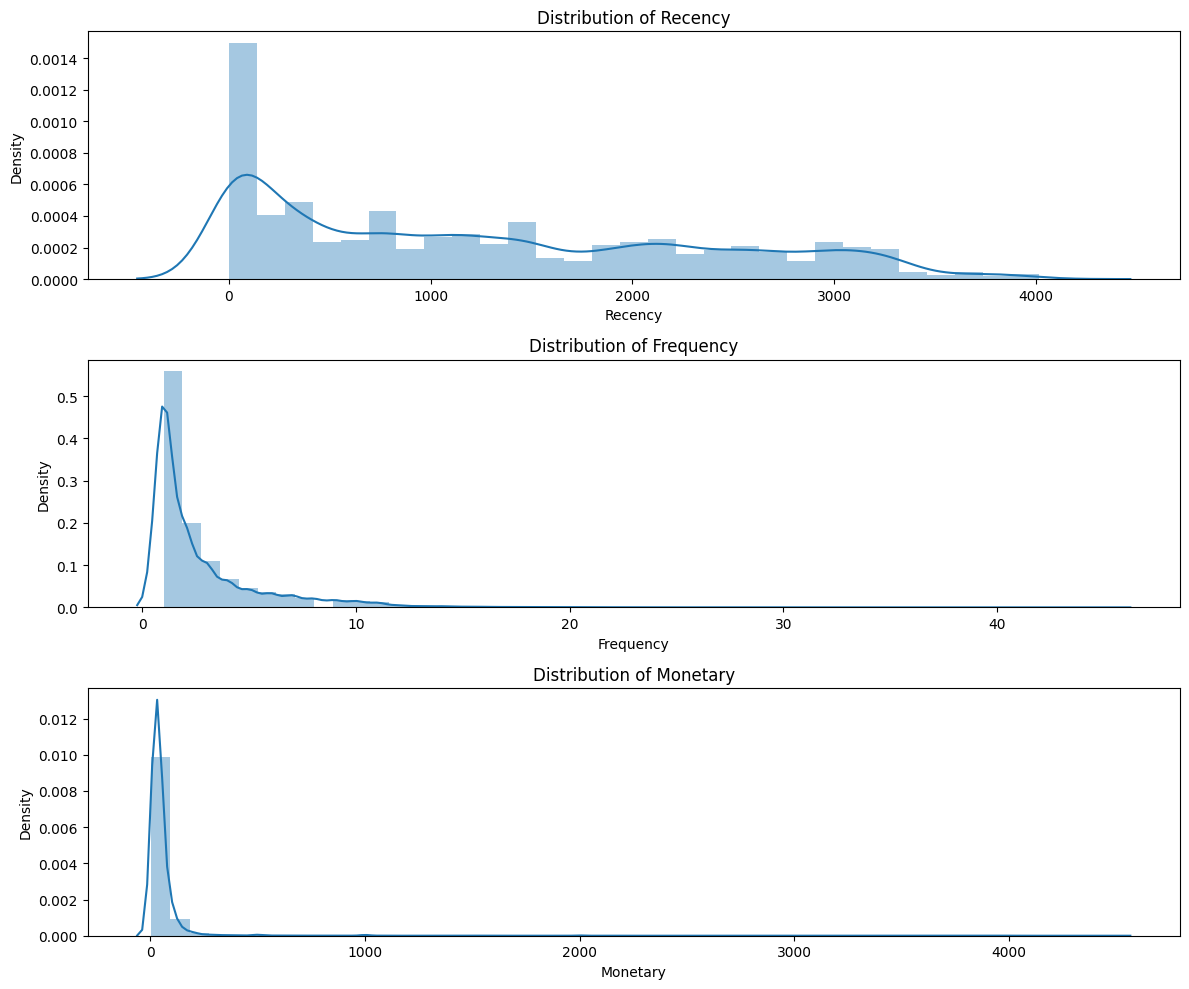

In [ ]:
#check distributions of Recency, Frequency, Monetary
plt.figure(figsize=(12,10))

# Plot distribution of R
plt.subplot(3, 1, 1)
sns.distplot(rfm['Recency'])
plt.title('Distribution of Recency')

# Plot distribution of F
plt.subplot(3, 1, 2)
sns.distplot(rfm['Frequency'])
plt.title('Distribution of Frequency')

# Plot distribution of M
plt.subplot(3, 1, 3)
sns.distplot(rfm['Monetary'])
plt.title('Distribution of Monetary')

plt.tight_layout()
plt.show()


In [ ]:
rfm.describe()

,cust_id,Recency,Frequency,Monetary
count,18417.000000,18417.000000,18417.000000,18417.000000
mean,137573.510887,1253.037900,2.782375,57.792985
std,69504.599881,1081.437868,2.936888,154.360109
min,10.000000,1.000000,1.000000,5.000000
25%,81990.000000,244.000000,1.000000,21.666667
50%,136430.000000,1070.000000,2.000000,30.000000
75%,195100.000000,2130.000000,3.000000,50.000000
max,264200.000000,4014.000000,45.000000,4500.000000


### Scaling the Data

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
# Log transformation to handle skewness
rfm['Recency_log'] = np.log1p(rfm['Recency'])
rfm['Frequency_log'] = np.log1p(rfm['Frequency'])
rfm['Monetary_log'] = np.log1p(rfm['Monetary'])

rfm.head()

,cust_id,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log
0,10,3829,1,30.000000,8.250620,0.693147,3.433987
1,80,343,7,71.428571,5.840642,2.079442,4.282601
2,90,758,10,115.800000,6.632002,2.397895,4.760463
3,120,1401,1,20.000000,7.245655,0.693147,3.044522
4,130,2970,2,50.000000,7.996654,1.098612,3.931826


In [ ]:
rfm.shape

(18417, 7)

In [ ]:
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(rfm[['Recency_log', 'Frequency_log', 'Monetary_log']])

In [ ]:
'''
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])
'''

"\n# Standardize the data\nscaler = StandardScaler()\ndata_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])\n"

### Clustering with K-Means

In [ ]:
clusters = int(input("Enter the maximum number of clusters: "))

Enter the maximum number of clusters: 10


In [ ]:
# Using the elbow method to find the optimal number of clusters
sse = []
for k in range(1, clusters+1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
# Calculate differences between successive SSE values
sse_diff = [j - i for i, j in zip(sse[:-1], sse[1:])]

In [ ]:
tolerence = float(input("Enter the tolerence limit: "))

Enter the tolerence limit: 0.01


In [ ]:
# Determine the optimal number of clusters
optimal_k = next((i+2 for i, diff in enumerate(sse_diff) if diff < tolerence), len(sse))
optimal_k

2

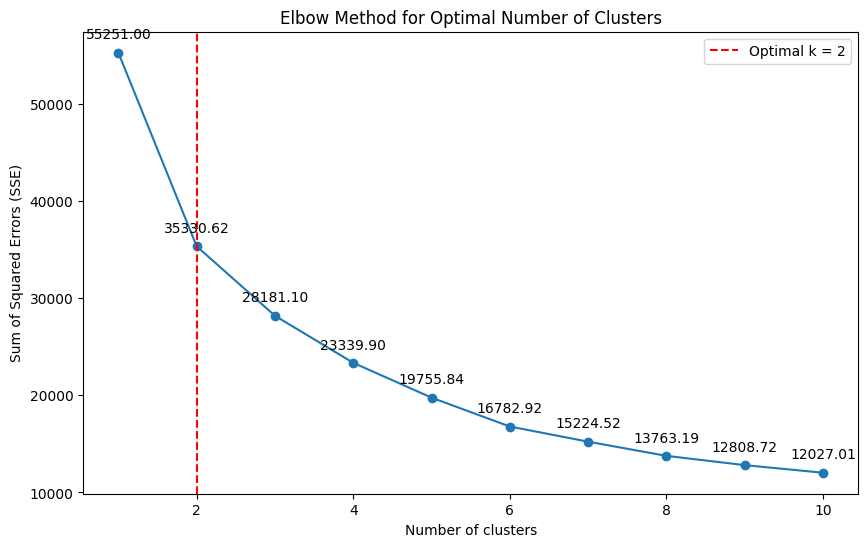

In [ ]:
# Plotting the elbow curve with SSE values
plt.figure(figsize=(10, 6))
plt.plot(range(1, clusters+1), sse, marker='o')

# Annotating each point with the SSE value
for i, txt in enumerate(sse):
    plt.annotate(f'{txt:.2f}', (i+1, sse[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal k = {optimal_k}')
plt.legend()
plt.show()

In [ ]:
# Choose the number of clusters (k) based on the elbow curve
kmeans = KMeans(n_clusters = optimal_k, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(data_scaled)

# Inspect the clusters
print(rfm.groupby('Cluster').mean())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


               cust_id      Recency  Frequency    Monetary  Recency_log  \
Cluster                                                                   
0        129817.227537   297.690302   5.811855  103.957772     4.330120   
1        140733.280605  1642.229253   1.548219   38.986285     7.059738   

         Frequency_log  Monetary_log  
Cluster                               
0             1.770819      4.017329  
1             0.885657      3.453558  


In [ ]:
# Choose the number of clusters (k) based on the elbow curve
# Manually choosing 7 as optimal_k value
kmeans = KMeans(n_clusters=7, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(data_scaled)

# Inspect the clusters
rfm.groupby('Cluster').mean()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,cust_id,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log
Cluster,,,,,,,
0,142148.933843,1741.878625,1.254558,37.987592,7.267734,0.796362,3.627374
1,128521.813486,1965.654432,1.324089,15.945691,7.408792,0.817435,2.789048
2,103163.363482,46.057660,8.387790,61.621046,3.005995,2.160148,3.917894
3,144790.452830,1356.947170,1.902516,111.831099,6.833316,1.002706,4.665172
4,94905.806751,991.336946,5.191391,37.662386,6.553824,1.758990,3.554325
5,153753.342776,744.509915,3.331445,828.149808,5.242944,1.276559,6.417369
6,229972.447278,55.508583,1.641000,42.269156,3.515229,0.927497,3.614932


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Assuming rfm is your DataFrame and data_scaled is your scaled data
# Choosing 7 as the optimal number of clusters
kmeans = KMeans(n_clusters=7, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(data_scaled)

# Inspect the clusters and calculate the mean values for each cluster
cluster_means = rfm.groupby('Cluster').mean()

# Add a column to show the number of customers in each cluster
cluster_counts = rfm['Cluster'].value_counts().sort_index()

# Combine the mean and count data into one DataFrame for better insight
cluster_summary = cluster_means.copy()
cluster_summary['Customer Count'] = cluster_counts

# Display the cluster summary
print(cluster_summary)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


               cust_id      Recency  Frequency    Monetary  Recency_log  \
Cluster                                                                   
0        142148.933843  1741.878625   1.254558   37.987592     7.267734   
1        128521.813486  1965.654432   1.324089   15.945691     7.408792   
2        103163.363482    46.057660   8.387790   61.621046     3.005995   
3        144790.452830  1356.947170   1.902516  111.831099     6.833316   
4         94905.806751   991.336946   5.191391   37.662386     6.553824   
5        153753.342776   744.509915   3.331445  828.149808     5.242944   
6        229972.447278    55.508583   1.641000   42.269156     3.515229   

         Frequency_log  Monetary_log  Customer Count  
Cluster                                               
0             0.796362      3.627374            5759  
1             0.817435      2.789048            3678  
2             2.160148      3.917894            1769  
3             1.002706      4.665172            1

In [ ]:
cluster_summary. drop(columns=["Recency_log", 'Frequency_log', 'Monetary_log'], inplace = True)

In [ ]:
cluster_summary

,cust_id,Recency,Frequency,Monetary,Customer Count
Cluster,,,,,
0,142148.933843,1741.878625,1.254558,37.987592,5759
1,128521.813486,1965.654432,1.324089,15.945691,3678
2,103163.363482,46.057660,8.387790,61.621046,1769
3,144790.452830,1356.947170,1.902516,111.831099,1590
4,94905.806751,991.336946,5.191391,37.662386,3229
5,153753.342776,744.509915,3.331445,828.149808,353
6,229972.447278,55.508583,1.641000,42.269156,2039


#MANAGERIAL IMPLEMENTATION

In [ ]:
rfm1.head()

,cust_id,Recency,Frequency,Monetary
0,10,3829,1,30.000000
1,80,343,7,71.428571
2,90,758,10,115.800000
3,120,1401,1,20.000000
4,130,2970,2,50.000000


In [ ]:
rfm1.columns

Index(['cust_id', 'Recency', 'Frequency', 'Monetary'], dtype='object')

In [ ]:
rfm1.isna().sum()

cust_id      0
Recency      0
Frequency    0
Monetary     0
dtype: int64

In [ ]:
# Analyze the Frequency distribution
print(rfm1['Frequency'].describe())
print(rfm1['Frequency'].value_counts())


count    18417.000000
mean         2.782375
std          2.936888
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         45.000000
Name: Frequency, dtype: float64
Frequency
1     9048
2     3245
3     1796
4     1080
5      729
6      579
7      497
8      360
9      298
10     264
11     196
12      85
13      51
14      48
15      29
16      25
17      17
19      14
18      13
20      11
21       8
22       5
26       3
23       3
27       2
28       2
34       2
45       1
25       1
37       1
41       1
29       1
38       1
24       1
Name: count, dtype: int64


In [ ]:
# Analyze the Frequency distribution
print(rfm1['Recency'].describe())
print(rfm1['Recency'].value_counts())

count    18417.000000
mean      1253.037900
std       1081.437868
min          1.000000
25%        244.000000
50%       1070.000000
75%       2130.000000
max       4014.000000
Name: Recency, dtype: float64
Recency
1       461
731     234
15      197
3       160
366     159
       ... 
2512      1
46        1
2232      1
2575      1
33        1
Name: count, Length: 1668, dtype: int64


In [ ]:
# Analyze the Frequency distribution
print(rfm1['Monetary'].describe())
print(rfm1['Monetary'].value_counts())

count    18417.000000
mean        57.792985
std        154.360109
min          5.000000
25%         21.666667
50%         30.000000
75%         50.000000
max       4500.000000
Name: Monetary, dtype: float64
Monetary
30.000000      3277
20.000000      1823
50.000000      1433
15.000000      1009
40.000000       935
               ... 
172.916667        1
36.744444         1
74.545455         1
45.500000         1
1862.000000       1
Name: count, Length: 1182, dtype: int64


In [ ]:
rfm1.isna().sum()

cust_id      0
Recency      0
Frequency    0
Monetary     0
dtype: int64

In [ ]:
# Step 1: Define custom bins with sufficient range
recency_bins = [0, 365, 1070, rfm1['Recency'].max() + 1]  # Include all possible values
frequency_bins = [0, 2, 4, rfm1['Frequency'].max() + 1]    # Include all possible values
monetary_bins = [0, 50, 100, rfm1['Monetary'].max() + 1]    # Include all possible values


In [ ]:
# Step 2: Assign scores using pd.cut
rfm1['R_Score'] = pd.cut(rfm1['Recency'], bins=recency_bins, labels=[3, 2, 1], right=False)
rfm1['F_Score'] = pd.cut(rfm1['Frequency'], bins=frequency_bins, labels=[1, 2, 3], right=False)
rfm1['M_Score'] = pd.cut(rfm1['Monetary'], bins=monetary_bins, labels=[1, 2, 3], right=False)

# Step 3: Check for NaNs
print("NaNs in R_Score:", rfm1['R_Score'].isna().sum())
print("NaNs in F_Score:", rfm1['F_Score'].isna().sum())
print("NaNs in M_Score:", rfm1['M_Score'].isna().sum())

NaNs in R_Score: 0
NaNs in F_Score: 0
NaNs in M_Score: 0


In [ ]:
# Recalculate total RFM score
rfm1['RFM_Score'] = rfm1['R_Score'].astype(int) * 100 + rfm1['F_Score'].astype(int) * 10 + rfm1['M_Score'].astype(int)

# Check the distribution of RFM scores
rfm_score_counts = rfm1['RFM_Score'].value_counts().sort_index()
print("RFM Score Counts:\n", rfm_score_counts)

RFM Score Counts:
 RFM_Score
111    4190
112     970
113     456
121    2051
122     414
123     197
131     656
132     178
133      97
211    1313
212     439
213     216
221     666
222     240
223     106
231     556
232     182
233      92
311     931
312     274
313     259
321     842
322     323
323     202
331    1523
332     669
333     375
Name: count, dtype: int64


In [ ]:
# Convert to DataFrame for easier handling
rfm_df = pd.DataFrame(rfm_score_counts).reset_index()
rfm_df.columns = ['RFM_Score', 'Count']

# Step 2: Sort the DataFrame by 'Count' in descending order
rfm_df = rfm_df.sort_values(by='Count', ascending=False)


##Visualising initial rfm score distribution

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-53-fd4f1af7b8ba>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='RFM_Score', y='Count', data=rfm_df, palette='viridis')


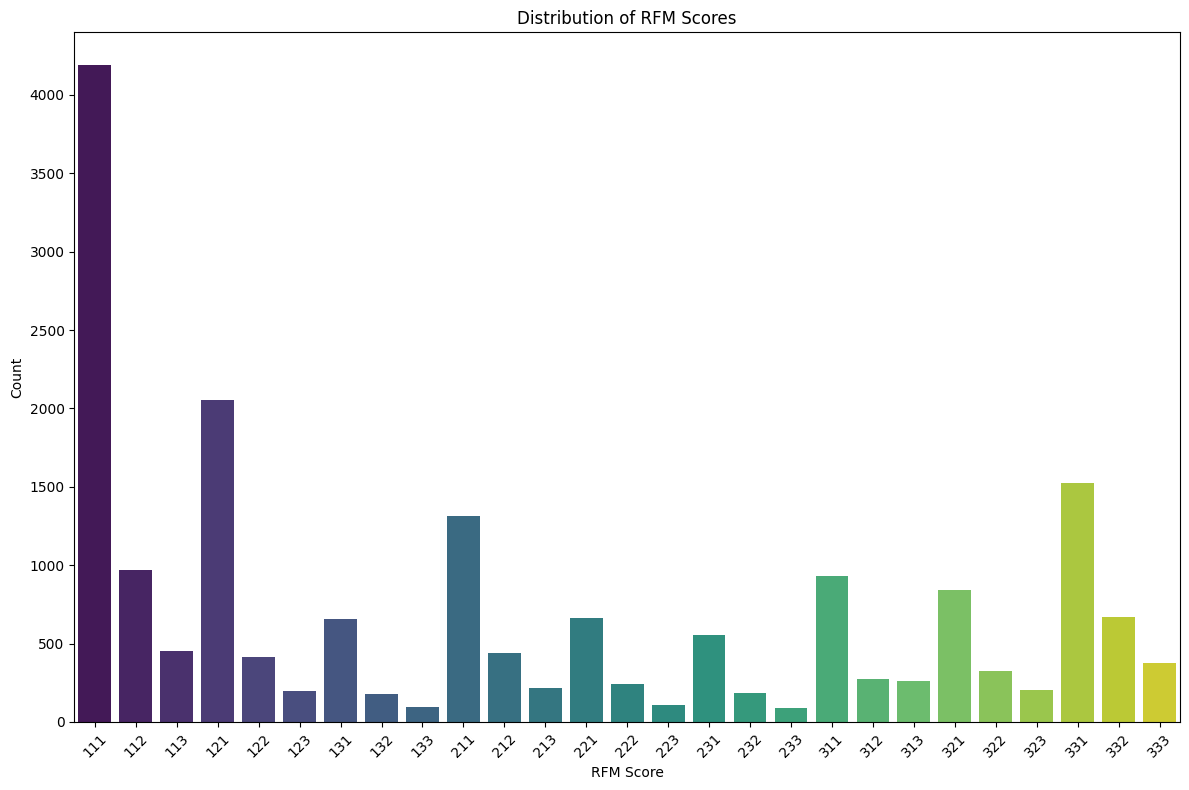

In [ ]:
# Step 3: Create a bar plot using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='RFM_Score', y='Count', data=rfm_df, palette='viridis')

# Step 4: Set labels and title
plt.xlabel('RFM Score')
plt.ylabel('Count')
plt.title('Distribution of RFM Scores')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent clipping
plt.tight_layout()

# Show plot
plt.show()

##Segment Creation

In [ ]:
#Use a Hierarchical Approach:

In [ ]:
# Check the unique RFM_Score values to ensure they match the expected format
print(rfm1['RFM_Score'].unique())


[111 332 233 122 121 132 112 231 232 131 123 331 113 133 312 221 333 311
 322 211 222 321 323 223 212 213 313]


In [ ]:
# Define the mapping from RFM scores to segment names
segment_mapping = {
    '111': 'COLD CASE', '112': 'COLD CASE', '113': 'COLD CASE',
    '121': 'COLD CASE', '122': 'COLD CASE', '123': 'COLD CASE',
    '131': 'COLD CASE', '132': 'COLD CASE', '133': 'COLD CASE',
    '211': 'Going Cold', '212': 'Going Cold', '213': 'Going Cold',
    '221': 'Lukewarm Regulars', '222': 'Lukewarm Regulars', '223': 'Lukewarm Regulars', '231': 'Lukewarm Regulars',
    '232': 'Heating Up', '233': 'Heating Up', '311': 'Heating Up', '312': 'Heating Up', '313': 'Heating Up',
    '321': 'Regulars', '322': 'Regulars', '323': 'Regulars',
    '331': 'Recent Regulars', '332': 'Recent Regulars',
    '333': 'Supreme Leaders'
}


In [ ]:
# Convert the RFM_Score column to string
rfm1['RFM_Score'] = rfm1['RFM_Score'].astype(str)

# Create a new column 'Segment' by mapping the RFM scores to segment names
rfm1['Segment'] = rfm1['RFM_Score'].map(segment_mapping)

In [ ]:
# Check if any RFM_Score values didn't map correctly (resulted in NaN)
missing_segments = rfm1[rfm1['Segment'].isna()]
if not missing_segments.empty:
    print("These RFM scores didn't map correctly and resulted in NaN segments:")
    print(missing_segments['RFM_Score'].unique())

# Display the first few rows to verify the segments
print(rfm1.head())

   cust_id  Recency  Frequency    Monetary R_Score F_Score M_Score RFM_Score  \
0       10     3829          1   30.000000       1       1       1       111   
1       80      343          7   71.428571       3       3       2       332   
2       90      758         10  115.800000       2       3       3       233   
3      120     1401          1   20.000000       1       1       1       111   
4      130     2970          2   50.000000       1       2       2       122   

           Segment  
0        COLD CASE  
1  Recent Regulars  
2       Heating Up  
3        COLD CASE  
4        COLD CASE  


In [ ]:
# Optionally, show the distribution of segments
segment_counts = rfm1['Segment'].value_counts()
print(segment_counts)

Segment
COLD CASE            9209
Recent Regulars      2192
Going Cold           1968
Heating Up           1738
Lukewarm Regulars    1568
Regulars             1367
Supreme Leaders       375
Name: count, dtype: int64


<ipython-input-63-722c730daa85>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='viridis')


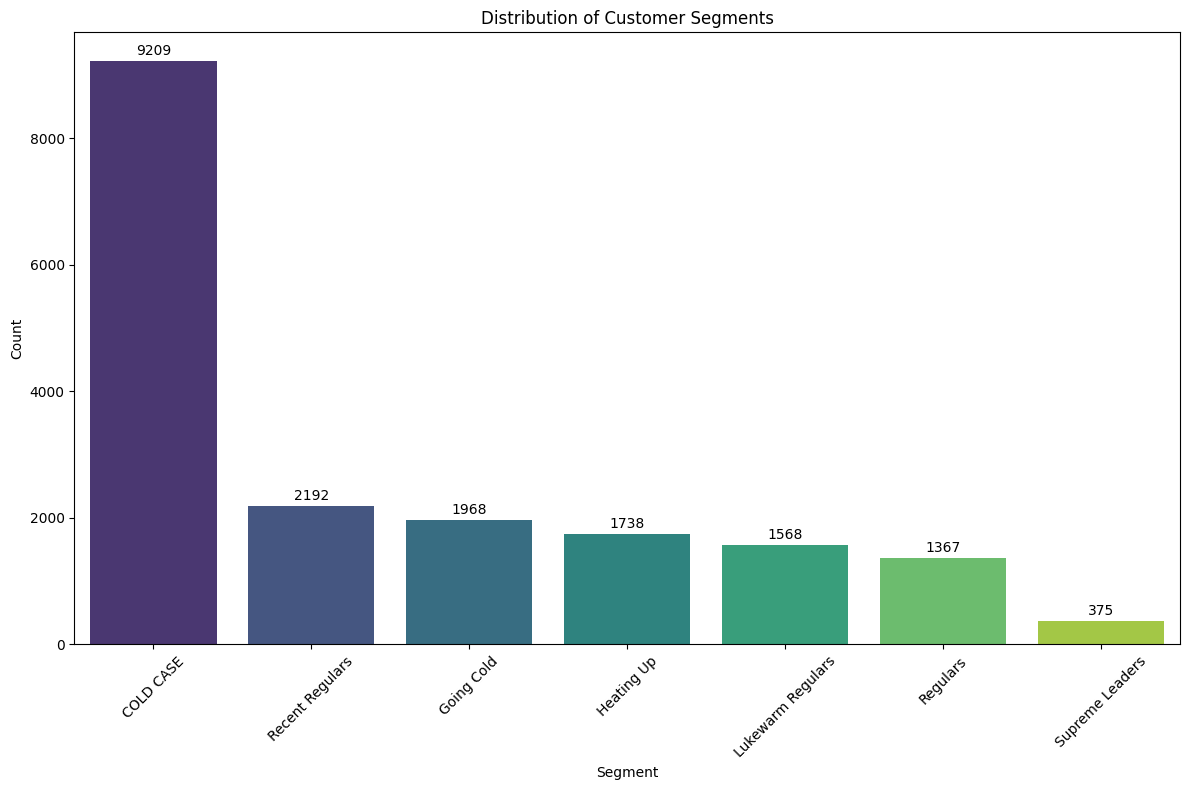

In [ ]:
# Plot the distribution of segments with counts
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='viridis')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.title('Distribution of Customer Segments')
plt.xticks(rotation=45)

# Add the count labels on top of the bars
for i, count in enumerate(segment_counts.values):
    ax.text(i, count + 50, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()